In [80]:
import numpy as np
import cmath as cm
import control as co_general
import matplotlib.pyplot as plt
import slycot
from control.matlab import *
import scipy

In [81]:
m1 = 2
m2 = 2
k1 = 50
k2 = 75
k3 = 50
b1 = 5
b2 = 5

A = np.asarray([[0,1,0,0],
     [-k1/m1-k2/m2,-b1/m1,k2/m2,0],
     [0,0,0,1],
     [k2/m2,0,-k3/m2-k2/m2,-b2/m2]])

B = np.asarray([[0,0,0],
     [1/m1,0,0],
     [0,0,0],
     [0,1/m2,k3/m2]])

C = np.asarray([[1,0,0,0],
     [0,0,1,0]])

D = np.zeros((2,3),np.int8)

sys = ss(A,B,C,D)

In [3]:
sys

A = [[  0.    1.    0.    0. ]
 [-62.5  -2.5  37.5   0. ]
 [  0.    0.    0.    1. ]
 [ 37.5   0.  -62.5  -2.5]]

B = [[ 0.   0.   0. ]
 [ 0.5  0.   0. ]
 [ 0.   0.   0. ]
 [ 0.   0.5 25. ]]

C = [[1. 0. 0. 0.]
 [0. 0. 1. 0.]]

D = [[0. 0. 0.]
 [0. 0. 0.]]

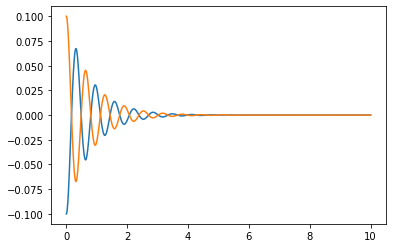

In [4]:
#simulacao com condicoes iniciais nao nulas
X0 = [-0.1,0,0.1,0]
T = np.linspace(0,10,1000)
yout,t,xout = initial(sys,T,X0,return_x=True)
plt.plot(t,yout)

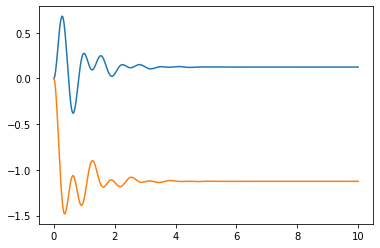

In [5]:
# sistema forçado degrau
n=1000
T = np.linspace(0,10,n)
U = np.zeros((n,3))

U[0:n,0] = 100.0
U[0:n,1] = -150.0
U[0:n,2] = 0.0

yout,t,xout = lsim(sys,U,T)
plt.plot(t,yout)

In [6]:
# transformação para TF
systf = ss2tf(sys)
systf


Input 1 to output 1:
        0.5 s^2 + 1.25 s + 31.25
----------------------------------------
s^4 + 5 s^3 + 131.2 s^2 + 312.5 s + 2500

Input 1 to output 2:
                  18.75
----------------------------------------
s^4 + 5 s^3 + 131.2 s^2 + 312.5 s + 2500

Input 2 to output 1:
                  18.75
----------------------------------------
s^4 + 5 s^3 + 131.2 s^2 + 312.5 s + 2500

Input 2 to output 2:
        0.5 s^2 + 1.25 s + 31.25
----------------------------------------
s^4 + 5 s^3 + 131.2 s^2 + 312.5 s + 2500

Input 3 to output 1:
                  937.5
----------------------------------------
s^4 + 5 s^3 + 131.2 s^2 + 312.5 s + 2500

Input 3 to output 2:
         25 s^2 + 62.5 s + 1562
----------------------------------------
s^4 + 5 s^3 + 131.2 s^2 + 312.5 s + 2500

In [7]:
damp(sys)

_____Eigenvalue______ Damping___ Frequency_
     -1.25    +9.922j      0.125         10
     -1.25    -9.922j      0.125         10
     -1.25    +4.841j       0.25          5
     -1.25    -4.841j       0.25          5


(array([10., 10.,  5.,  5.]),
 array([0.125, 0.125, 0.25 , 0.25 ]),
 array([-1.25+9.92156742j, -1.25-9.92156742j, -1.25+4.84122918j,
        -1.25-4.84122918j]))

In [8]:
np.linalg.eig(A)

(array([-1.25+9.92156742j, -1.25-9.92156742j, -1.25+4.84122918j,
        -1.25-4.84122918j]),
 array([[ 0.00879497+6.98079047e-02j,  0.00879497-6.98079047e-02j,
         -0.03466876-1.34271539e-01j, -0.03466876+1.34271539e-01j],
        [-0.70359754-3.61150305e-17j, -0.70359754+3.61150305e-17j,
          0.69337525+0.00000000e+00j,  0.69337525-0.00000000e+00j],
        [-0.00879497-6.98079047e-02j, -0.00879497+6.98079047e-02j,
         -0.03466876-1.34271539e-01j, -0.03466876+1.34271539e-01j],
        [ 0.70359754+0.00000000e+00j,  0.70359754-0.00000000e+00j,
          0.69337525+1.00693231e-16j,  0.69337525-1.00693231e-16j]]))

In [82]:
#Vamos considerar apenas F1,e saída apenas x2 
B = np.asarray([[0],
     [1/m1],
     [0],
     [0]])

C = np.asarray([[0,0,1,0]])

D = np.zeros((1,1),np.int8)

sys = ss(A,B,C,D)

#controlabilidade
CC = ctrb(A,B)
print(np.linalg.matrix_rank(CC))

#observabilidade 
OBS = obsv(A,C)
print(np.linalg.matrix_rank(OBS))


4
4


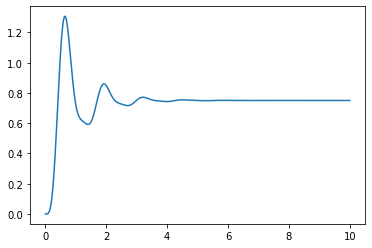

In [83]:
# sistema forçado degrau
n=1000
T = np.linspace(0,10,n)
U = np.zeros((n,1))

U[0:n,0] = 100.0

yout,t,xout = lsim(sys,U,T)
plt.plot(t,yout)

In [85]:
poles,vectors = np.linalg.eig(A)
print(poles)
damp(sys)


[-1.25+9.92156742j -1.25-9.92156742j -1.25+4.84122918j -1.25-4.84122918j]
_____Eigenvalue______ Damping___ Frequency_
     -1.25    +9.922j      0.125         10
     -1.25    -9.922j      0.125         10
     -1.25    +4.841j       0.25          5
     -1.25    -4.841j       0.25          5


(array([10., 10.,  5.,  5.]),
 array([0.125, 0.125, 0.25 , 0.25 ]),
 array([-1.25+9.92156742j, -1.25-9.92156742j, -1.25+4.84122918j,
        -1.25-4.84122918j]))

(array([-13., -12., -11., -10.]), array([], dtype=float64))

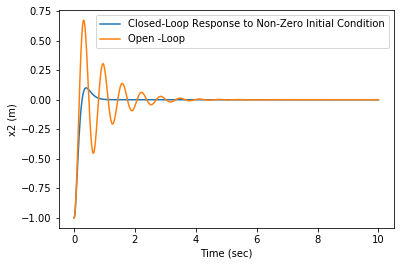

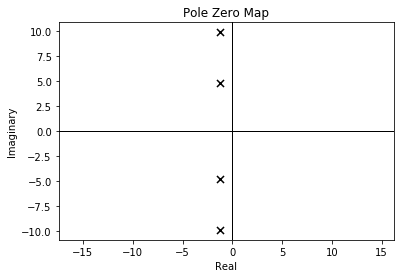

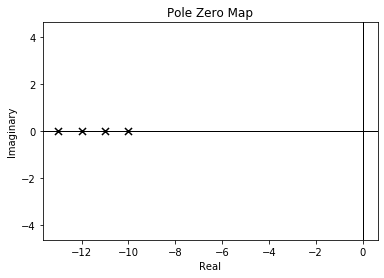

In [86]:
#polos escolhidos 1
pole = [-10+0j,-11-0j,-12-0j,-13+0j]
K = place(A,B,pole)

Nr=1
sys_cl = ss(A-B*K , Nr*B , C , 0)

X0 = [1,0,-1,0]
T = np.linspace(0,10,1000)
yout,t,xout = initial(sys_cl,T,X0,return_x=True)
plt.figure()
plt.plot(t,yout)
plt.xlabel('Time (sec)')
plt.ylabel('x2 (m)')


X0 = [1,0,-1,0]
T = np.linspace(0,10,1000)
yout,t,xout = initial(sys,T,X0,return_x=True)
plt.plot(t,yout)
plt.legend(['Closed-Loop Response to Non-Zero Initial Condition','Open -Loop'])

plt.figure
pzmap(sys)
plt.figure
pzmap(sys_cl)

Projeto com referência de posição

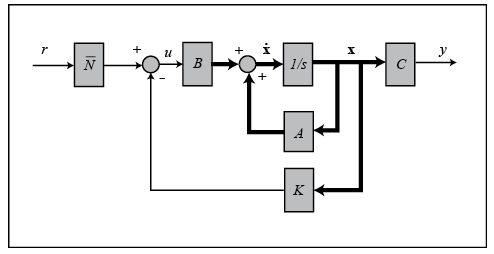

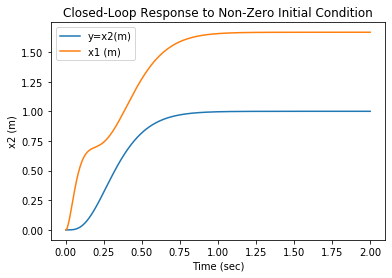

In [87]:
#referência r
pole = [-10+0j,-11-0j,-12-0j,-13+0j]
K = place(A,B,pole)

Nr = 1
sys_cl = ss(A-B*K , Nr*np.asarray(B) , C , 0)

Nr = 1/dcgain(sys_cl)
sys_cl = ss(A-B*K,Nr*np.asarray(B),C,0)

n=1000
T = np.linspace(0,2,n)
R = np.zeros((n,1))
R[0:n,0] = 1

yout,t,xout = lsim(sys_cl,R,T)
plt.figure()
plt.plot(t,yout)
plt.title('Closed-Loop Response to Non-Zero Initial Condition')
plt.xlabel('Time (sec)')
plt.ylabel('x2 (m)')
plt.plot(t,xout[:,0])
plt.title('Closed-Loop Response to Non-Zero Initial Condition')
plt.xlabel('Time (sec)')
plt.legend(['y=x2(m)','x1 (m)'])

Controlador e Observador
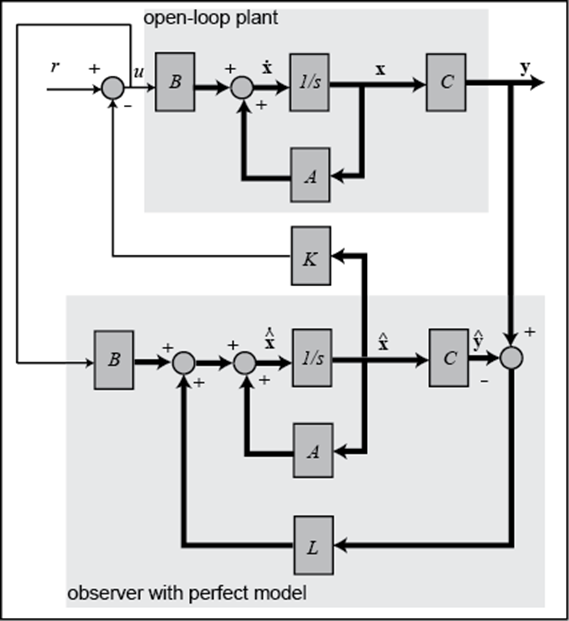

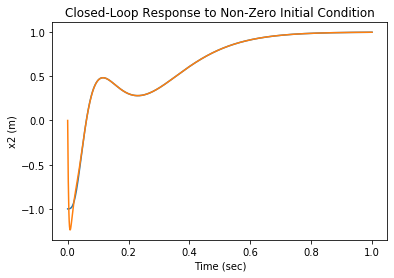

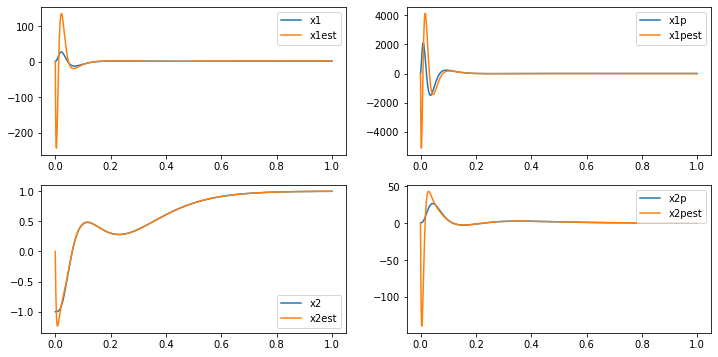

In [93]:
#Observador
pole = 10*np.asarray([-10+0j,-11-0j,-12-0j,-13+0j])
L = np.transpose(place(np.transpose(A),np.transpose(C),pole))
Nr = 1

obsys = ss(np.block([[A, -B@K], [L@C, A - B@K - L@C]]),
  np.block([[B], [B]]) * Nr,
  np.block([[C, np.zeros(C.shape)], [np.zeros(C.shape), C]]),
  np.zeros((2,1)))

Nr = 1/dcgain(obsys)[0]
obsys = ss(np.block([[A, -B@K], [L@C, A - B@K - L@C]]),
  np.block([[B], [B]]) * Nr,
  np.block([[C, np.zeros(C.shape)], [np.zeros(C.shape), C]]),
  np.zeros((2,1)))

n=1000
T = np.linspace(0,1,n)
R = np.zeros((n,1))
R[0:n,0] = 1

X0 = [1,0,-1,0,0,0,0,0]
yout,t,xout = lsim(obsys,R,T,X0)
plt.figure()
plt.plot(t,yout)
plt.title('Closed-Loop Response to Non-Zero Initial Condition')
plt.xlabel('Time (sec)')
plt.ylabel('x2 (m)')

   
fig, axs = plt.subplots(2,2,figsize=(12, 6))
axs[0,0].plot(t,xout[:,0],t,xout[:,4])
axs[0,0].legend(['x1','x1est'])
axs[0,1].plot(t,xout[:,1],t,xout[:,5])
axs[0,1].legend(['x1p','x1pest'])
axs[1,0].plot(t,xout[:,2],t,xout[:,6])
axs[1,0].legend(['x2','x2est'])
axs[1,1].plot(t,xout[:,3],t,xout[:,7])
axs[1,1].legend(['x2p','x2pest'])